<a href="https://colab.research.google.com/github/aryamanak10/GRIP-The-Sparks-Foundation-Internship/blob/master/Task%203/Task_3_To_Explore_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intern Name: Aryaman S. Kakad

## To Explore Unsupervised Machine Learning

**Problem Statement:** The goal is to predict optimum number of clusters for the given **IRIS** dataset and represent it visually.

## Dataset and Algorithm:

This dataset contains 3 classes of 50 instances each and each class refers to a certain type of Iris plant. The dataset has four features: **sepal length, sepal width, petal length, and petal width**. The fifth column is for species, which holds the label for specific types of Iris plant.

We will be implementing the **K-Means Clustering Algorithm**, which is an Unsupervised Machine Learning Algorithm to predict the correct label of the Iris Plant and get the optimal number of clusters for the **IRIS** dataset.

## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the IRIS Dataset and Displaying it

In [3]:
data=pd.read_csv("Iris.csv")

data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [4]:
# Summary of the Dataset

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
# .info() gives the information and the structure of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Provides the datatype of each feature

print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


### Checking for NAN or Missing Values

In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Returning shape of the Dataset

data.shape

(150, 6)

In [10]:
# Returns the columns in the Dataset

data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.groupby('Species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


### Checking for Imbalanced Dataset

In [12]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Correlation Matrix

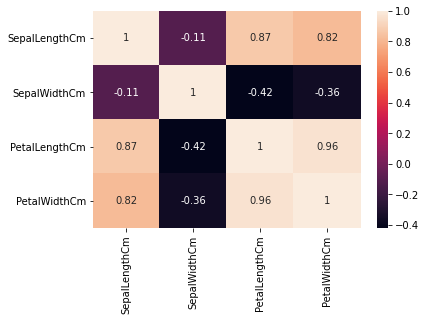

In [13]:
new_data= data.drop('Id',axis=1)
sns.heatmap(new_data.corr(), annot=True)

**Inference**:

1. Petal Width and Sepal Length are highly positive correlated

2. Sepal Width and Petal Length and negatively correlated.

3. Sepal Width and Sepal Length are slightly negative correlated.

4. Petal Width and Petal Length are highly positive correlated.

## Data visualization

* Now, we will plot a barplot for each of the **Dependent feature vs the Species.**

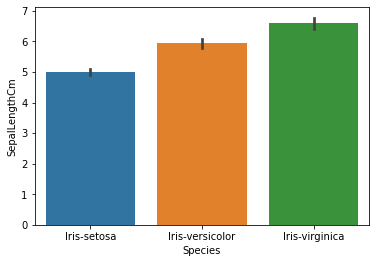

In [14]:
sns.barplot(data['Species'], data['SepalLengthCm'])

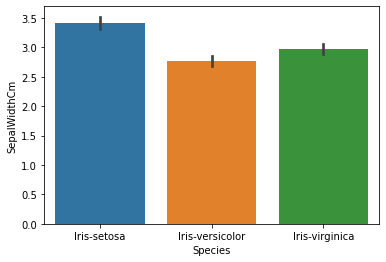

In [15]:
sns.barplot(data['Species'], data['SepalWidthCm'])

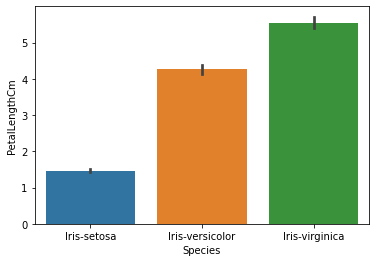

In [16]:
sns.barplot(data['Species'], data['PetalLengthCm'])

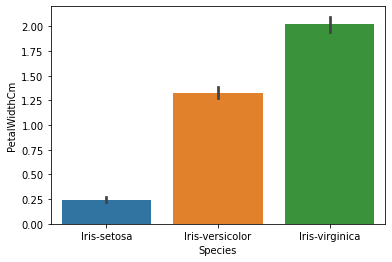

In [17]:
sns.barplot(data['Species'], data['PetalWidthCm'])

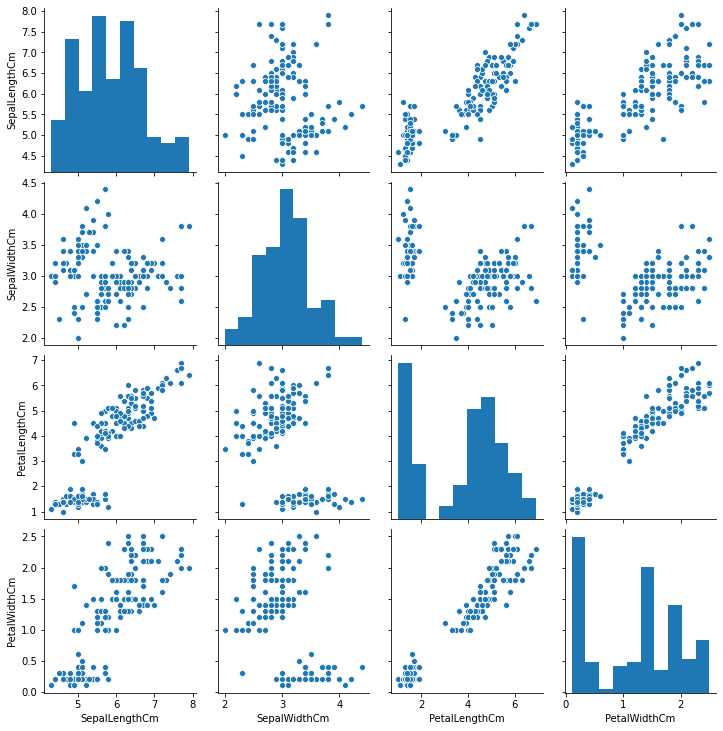

In [18]:
sns.pairplot(data.drop('Id',axis=1))

### Plotting the Clusters of the Dependent Features

Text(0.5, 1.0, 'Depedent Features Cluster')

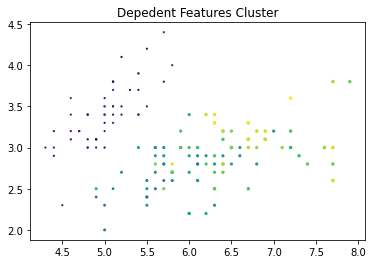

In [19]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])
plt.title('Depedent Features Cluster')

### Pair Plot with respect to each of the Species

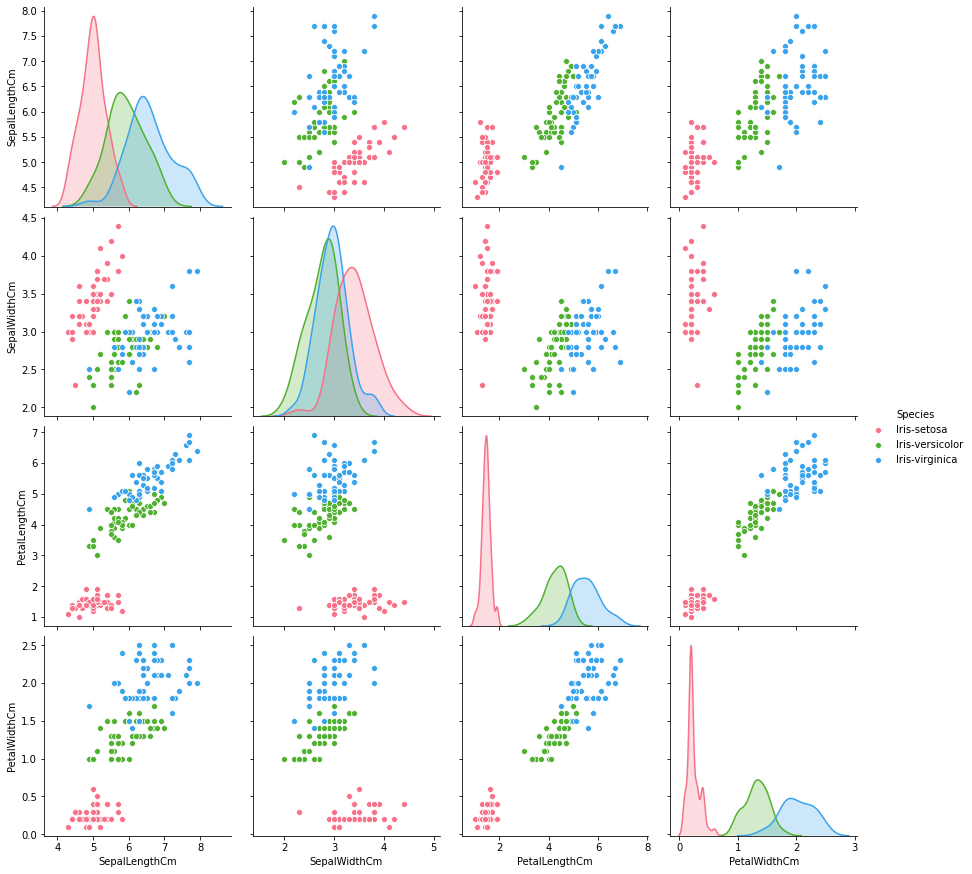

In [20]:
sns.pairplot(data.drop('Id',axis=1), hue="Species", palette="husl", height=3, diag_kind='kde')

#K-Means Clustering

In [21]:
# Extracting the Dependent and Independent Variable

X = data.iloc[:, [1, 2, 3, 4]].values

In [22]:
from sklearn.cluster import KMeans

# Creating an Empty list which will contain the SSE --> Sum of Squared Distances Error.
wsse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)

    # "kmeans.inertia_" --> Returns the error for the specific number of clusters and we append it the empty list.
    wsse.append(kmeans.inertia_)
wsse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

### Elbow Curve

* Helps us in determining the optimal number of clusters for a given datasets using the SSE.

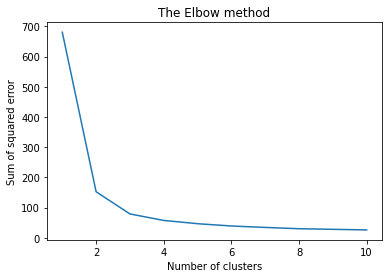

In [23]:
# Plotting the results onto a line graph

plt.plot(range(1, 11), wsse)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

* From the above graph, we see that elbow shape appears at 3. 

* This means the change in error/SSE is minimal after this point.

* Hence, the optimal number of cluster is **'3'**

### Silhouette Analysis

* Helps in finding the optimal number of clusters

* A value near +1 indicates that the sample is far away from the neighboring clusters.

* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster

In [24]:
Y = data.iloc[:, 5].values

from sklearn import metrics
score = metrics.silhouette_score(X, Y)
score

0.5032506980665505

#### Distribution of Silhouette Scores

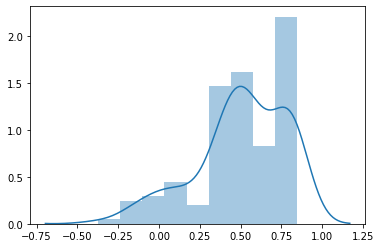

In [25]:
scores = metrics.silhouette_samples(X, Y)
sns.distplot(scores)

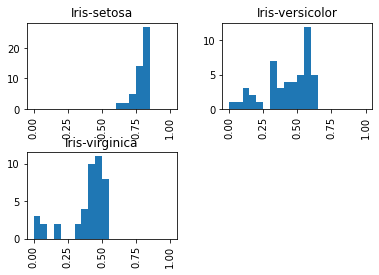

In [26]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

#### **Inference**: Iris Versicolor and Iris Virginica have lower silhouette scores than the more separate Iris Setosas, because they are closer together.

## Prediction of the Values in the Dataset

In [29]:
# Fitting K-Means Model to the Training Dataset with the optimal number of clusters i.e '3'

kmeans = KMeans(n_clusters = 3,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)

Y_Pred = kmeans.fit_predict(X)

In [30]:
Y_Pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Cluster Centers

In [31]:
centroids = kmeans.cluster_centers_

print("Centroid values")
print(centroids)

Centroid values
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


## Total Observation in 3 Clusters

In [32]:
data["Cluster"] = Y_Pred
pd.value_counts(data["Cluster"])

2    62
1    50
0    38
Name: Cluster, dtype: int64

## Visualization of clusters

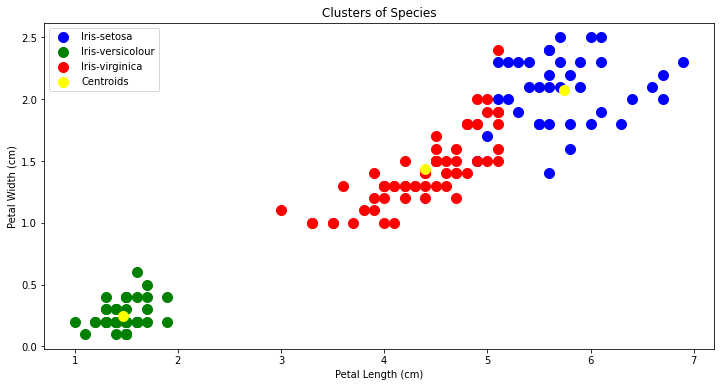

In [33]:
# Visualising the clusters of Petal Length and Petal Width

plt.figure(figsize =(12,6))
plt.scatter(X[Y_Pred == 0, 2], X[Y_Pred == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_Pred == 1, 2], X[Y_Pred == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_Pred == 2, 2], X[Y_Pred == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')
 
# Plotting the Centroids of Each Custer
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

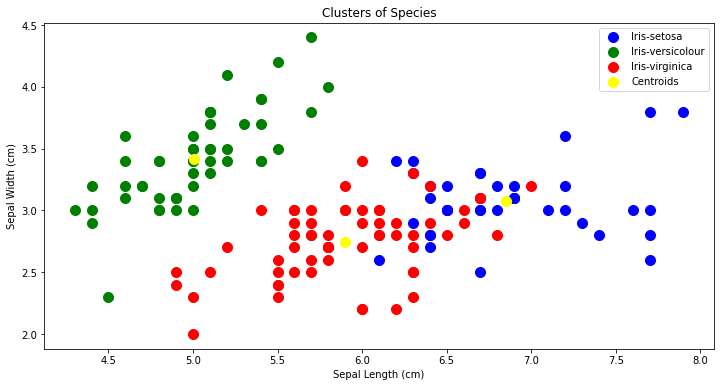

In [34]:
# Visualising the Clusters of Sepal Length and Sepal Width

plt.figure(figsize =(12,6))
plt.scatter(X[Y_Pred == 0, 0], X[Y_Pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_Pred == 1, 0], X[Y_Pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_Pred == 2, 0], X[Y_Pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')


# Plotting the Centroid of Each Cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

### Evaluating the K-Means Model

In [35]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(Y, Y_Pred)
score

0.7302382722834697

## Gaussian Mixture Model (GMM) Clustering


* Now, we will try the GMM clustering  which tries to fit normally-distributed clusters, which is the case when measuring things like Petal and Sepal Sizes

### Creating the Model and Fitting the Data

In [36]:
from sklearn.mixture import GaussianMixture

# We selected the components as 3 because that is the optimal number of clusters.
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Prediction of the data points

In [37]:
y_cluster_gmm = gmm.predict(X)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Total Observations in the 3 clusters

In [38]:
data["Cluster"] = y_cluster_gmm
pd.value_counts(data["Cluster"])

2    55
0    50
1    45
Name: Cluster, dtype: int64

### Visualising the GMM Clusters

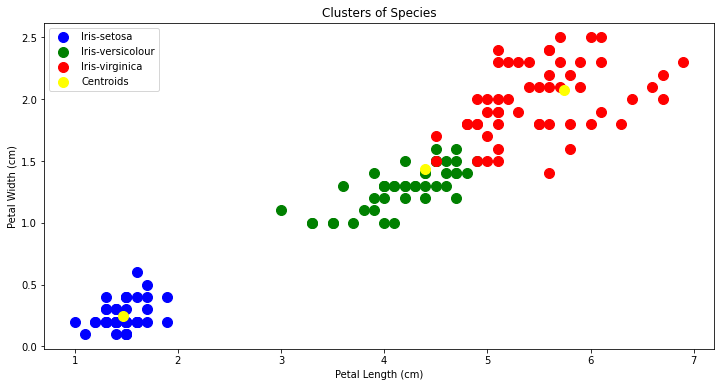

In [39]:
# Visualising the clusters of Petal Length and Petal Width

plt.figure(figsize =(12,6))
plt.scatter(X[y_cluster_gmm == 0, 2], X[y_cluster_gmm == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_cluster_gmm == 1, 2], X[y_cluster_gmm == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_cluster_gmm == 2, 2], X[y_cluster_gmm == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')
 
# Plotting the Centroids of Each Custer
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

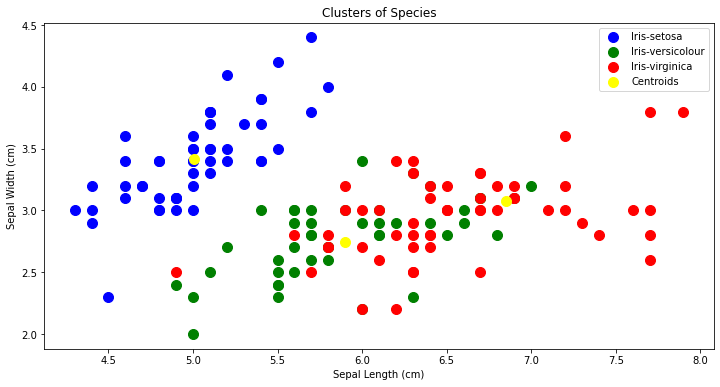

In [40]:
# Visualising the Clusters of Sepal Length and Sepal Width

plt.figure(figsize =(12,6))
plt.scatter(X[y_cluster_gmm == 0, 0], X[y_cluster_gmm == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_cluster_gmm == 1, 0], X[y_cluster_gmm == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_cluster_gmm == 2, 0], X[y_cluster_gmm == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')


# Plotting the Centroid of Each Cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

### Evaluating the GMM Clustering

In [41]:
score = adjusted_rand_score(Y, y_cluster_gmm)
score

0.9038742317748124

# Hierarchical Clustering

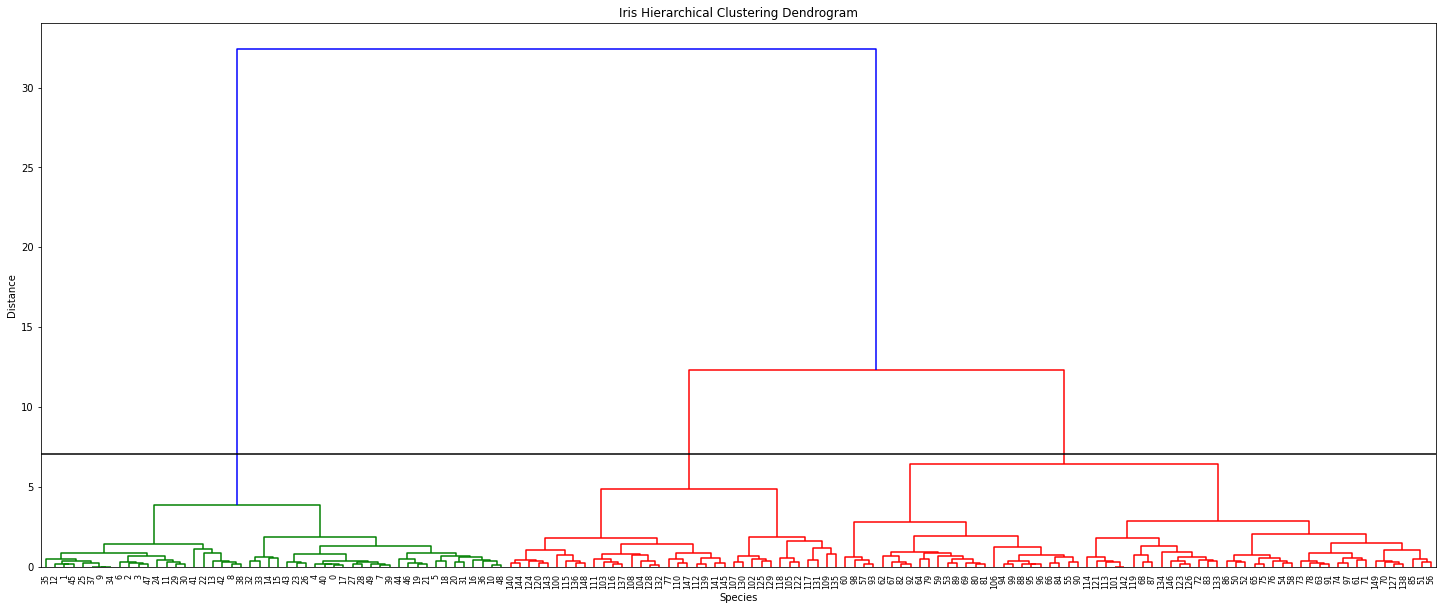

In [42]:
# Generating the Full Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating the Linkage Matrix
Z = linkage(X, 'ward')

# set cut-off to 7.08, max_d as in max_distance
max_d = 7.08                

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # Shows only the last 'p' merged clusters
    p=150,                  # Try changing values of 'p'
    leaf_rotation=90.,      # Rotates the x axis labels
    leaf_font_size=8.,      # Font size for the x axis labels
)

# Plots the line for the optimal number of clusters
plt.axhline(y=max_d, c='k')
plt.show()

### Conclusion

* **The GMM clustering performs better than the K-Means Clustering as it has a better accuracy of 90.3% than the 73% of K-Means**